In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import requests
import pandas as pd

In [2]:
ticker = "RIVN"
api_key = "ec2d6f3b0cc9395fbce02f1316669229"
years = 10

In [3]:
url = (f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?limit={years}&apikey={api_key}")
r = requests.get(url)
income_statement = r.json()

print(income_statement)

[{'date': '2022-12-31', 'symbol': 'RIVN', 'reportedCurrency': 'USD', 'cik': '0001874178', 'fillingDate': '2023-02-28', 'acceptedDate': '2023-02-28 17:15:26', 'calendarYear': '2022', 'period': 'FY', 'revenue': 1658000000, 'costOfRevenue': 4781000000, 'grossProfit': -3123000000, 'grossProfitRatio': -1.8835946924, 'researchAndDevelopmentExpenses': 1944000000, 'generalAndAdministrativeExpenses': 0, 'sellingAndMarketingExpenses': 0, 'sellingGeneralAndAdministrativeExpenses': 1789000000, 'otherExpenses': 18000000, 'operatingExpenses': 3733000000, 'costAndExpenses': 8514000000, 'interestIncome': 193000000, 'interestExpense': 103000000, 'depreciationAndAmortization': 863000000, 'ebitda': -5993000000, 'ebitdaratio': -3.6145958987, 'operatingIncome': -6856000000, 'operatingIncomeRatio': -4.1351025332, 'totalOtherIncomeExpensesNet': 108000000, 'incomeBeforeTax': -6748000000, 'incomeBeforeTaxRatio': -4.0699638118, 'incomeTaxExpense': 4000000, 'netIncome': -6752000000, 'netIncomeRatio': -4.07237635

In [4]:
df_income_statement = pd.DataFrame(income_statement)
print(df_income_statement)


         date symbol reportedCurrency         cik fillingDate  \
0  2022-12-31   RIVN              USD  0001874178  2023-02-28   
1  2021-12-31   RIVN              USD  0001874178  2022-03-31   
2  2020-12-31   RIVN              USD  0001874178  2020-12-31   
3  2019-12-31   RIVN              USD  0001874178  2019-12-31   

          acceptedDate calendarYear period     revenue  costOfRevenue  ...  \
0  2023-02-28 17:15:26         2022     FY  1658000000     4781000000  ...   
1  2022-03-31 08:22:02         2021     FY    55000000      520000000  ...   
2  2020-12-31 00:00:00         2020     FY           0              0  ...   
3  2019-12-31 00:00:00         2019     FY           0              0  ...   

   incomeBeforeTaxRatio  incomeTaxExpense   netIncome  netIncomeRatio   eps  \
0             -4.069964           4000000 -6752000000       -4.072376 -7.40   
1            -85.236364          28000000 -4716000000      -85.745455 -5.24   
2              0.000000           9000000 -102

In [5]:
df_income_statement.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2022-12-31,RIVN,USD,0001874178,2023-02-28,2023-02-28 17:15:26,2022,FY,1658000000,4781000000,...,-4.069964,4000000,-6752000000,-4.072376,-7.40,-7.40,913000000,913000000,https://www.sec.gov/Archives/edgar/data/187417...,https://www.sec.gov/Archives/edgar/data/187417...
1,2021-12-31,RIVN,USD,0001874178,2022-03-31,2022-03-31 08:22:02,2021,FY,55000000,520000000,...,-85.236364,28000000,-4716000000,-85.745455,-5.24,-5.24,900000000,900000000,https://www.sec.gov/Archives/edgar/data/187417...,https://www.sec.gov/Archives/edgar/data/187417...
2,2020-12-31,RIVN,USD,0001874178,2020-12-31,2020-12-31 00:00:00,2020,FY,0,0,...,0.000000,9000000,-1027000000,0.000000,-1.42,-1.42,723000000,723000000,None,None
3,2019-12-31,RIVN,USD,0001874178,2019-12-31,2019-12-31 00:00:00,2019,FY,0,0,...,0.000000,33000000,-459000000,0.000000,-0.63,-0.63,723000000,723000000,None,None


In [6]:
df_income_statement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     4 non-null      object 
 1   symbol                                   4 non-null      object 
 2   reportedCurrency                         4 non-null      object 
 3   cik                                      4 non-null      object 
 4   fillingDate                              4 non-null      object 
 5   acceptedDate                             4 non-null      object 
 6   calendarYear                             4 non-null      object 
 7   period                                   4 non-null      object 
 8   revenue                                  4 non-null      int64  
 9   costOfRevenue                            4 non-null      int64  
 10  grossProfit                              4 non-null   

In [7]:
#Gross Profit Margin - it reveals the ability of an organization to earn a reasonable return on its offerings
def format_float(gpm):
    return f'{gpm:,.2f}'
gpm = df_income_statement[['grossProfit', 'revenue']].applymap(format_float)
print(gpm)

gross_profit_margin = df_income_statement['grossProfit'][0] / df_income_statement['revenue'][0] * 100
print(f'{gross_profit_margin:.2f}')

         grossProfit           revenue
0  -3,123,000,000.00  1,658,000,000.00
1    -465,000,000.00     55,000,000.00
2               0.00              0.00
3               0.00              0.00
-188.36


/var/folders/07/hp5ltwgs395flys9xp50kcqh0000gn/T/ipykernel_30200/2583458648.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


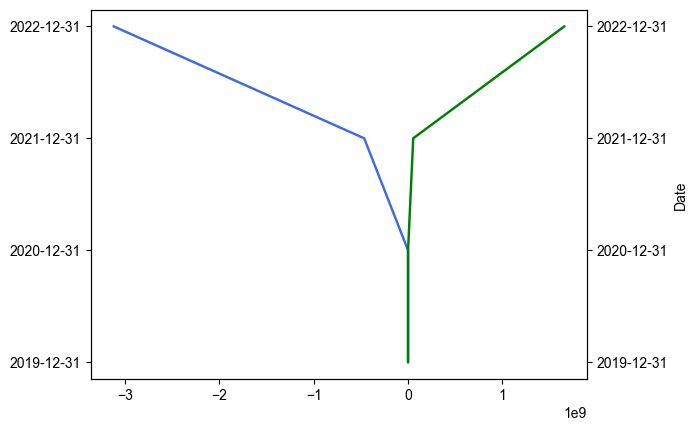

In [8]:
df = df_income_statement.sort_index(ascending = False)
df[['date', 'grossProfit', 'revenue']].head()

fig, ax = plt.subplots()
ax2 = ax.twinx()

plt.style.use('seaborn')
plt.xlabel('Gross Profit and Revenue')
plt.ylabel('Date')
ax.plot(df['grossProfit'], df['date'], color = "royalblue")
ax2.plot(df['revenue'], df['date'], color = 'g')


plt.show()


In [9]:
#Net Profit Margin - This is the Ultimate analysis item -  can a business earn a profit when all deductions are considered
def format_float(npm):
    return f'{npm:,.2f}'
npm = df_income_statement[['netIncome', 'revenue']].applymap(format_float)
print(npm)

net_profit_margin = df_income_statement['netIncome'][0] / df_income_statement['revenue'][0] * 100
print(f'{net_profit_margin:.2f}')

           netIncome           revenue
0  -6,752,000,000.00  1,658,000,000.00
1  -4,716,000,000.00     55,000,000.00
2  -1,027,000,000.00              0.00
3    -459,000,000.00              0.00
-407.24


In [10]:
#Interest Coverage Ratio
def format_float(icr):
    return f'{icr:,.2f}'
icr = df_income_statement[['ebitda', 'interestExpense']].applymap(format_float)
print(icr)

int_coverage_ratio = df_income_statement['ebitda'][0] / df_income_statement['interestExpense'][0]
print(f'{int_coverage_ratio:.2f}')

              ebitda interestExpense
0  -5,993,000,000.00  103,000,000.00
1  -4,021,000,000.00   29,000,000.00
2    -981,000,000.00    8,000,000.00
3    -385,000,000.00   34,000,000.00
-58.18


In [11]:
#Operating Margin - It reveals the amount that a business has earned before financing other costs are considered
def format_float(om):
    return f'{om:,.2f}'
om = df_income_statement[["ebitda", 'revenue']].applymap(format_float)

operating_margin = df_income_statement['ebitda'][0] / df_income_statement['revenue'][0]
print(f'{operating_margin:.2f}')

-3.61
